Titanic DataSet Analysis

In [1]:
print("Start")

Start


In [2]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

In [3]:
dftrain = pd.read_csv("/home/buttsy/ML/PythonLabs/train.csv")
dftest = pd.read_csv("/home/buttsy/ML/PythonLabs/test.csv")
dfss = pd.read_csv("/home/buttsy/ML/PythonLabs/gender_submission.csv")

In [4]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Training Set: ", dftrain.shape)
print("Test Set: ", dftest.shape)

Training Set:  (891, 12)
Test Set:  (418, 11)


Overview complete above

In [7]:
dfss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


More information regarding the missing values and classes

Training Set

In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Test Set

In [9]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Missing Data in the Training set
dftrain.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# Missing Data in the Test set
dftest.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

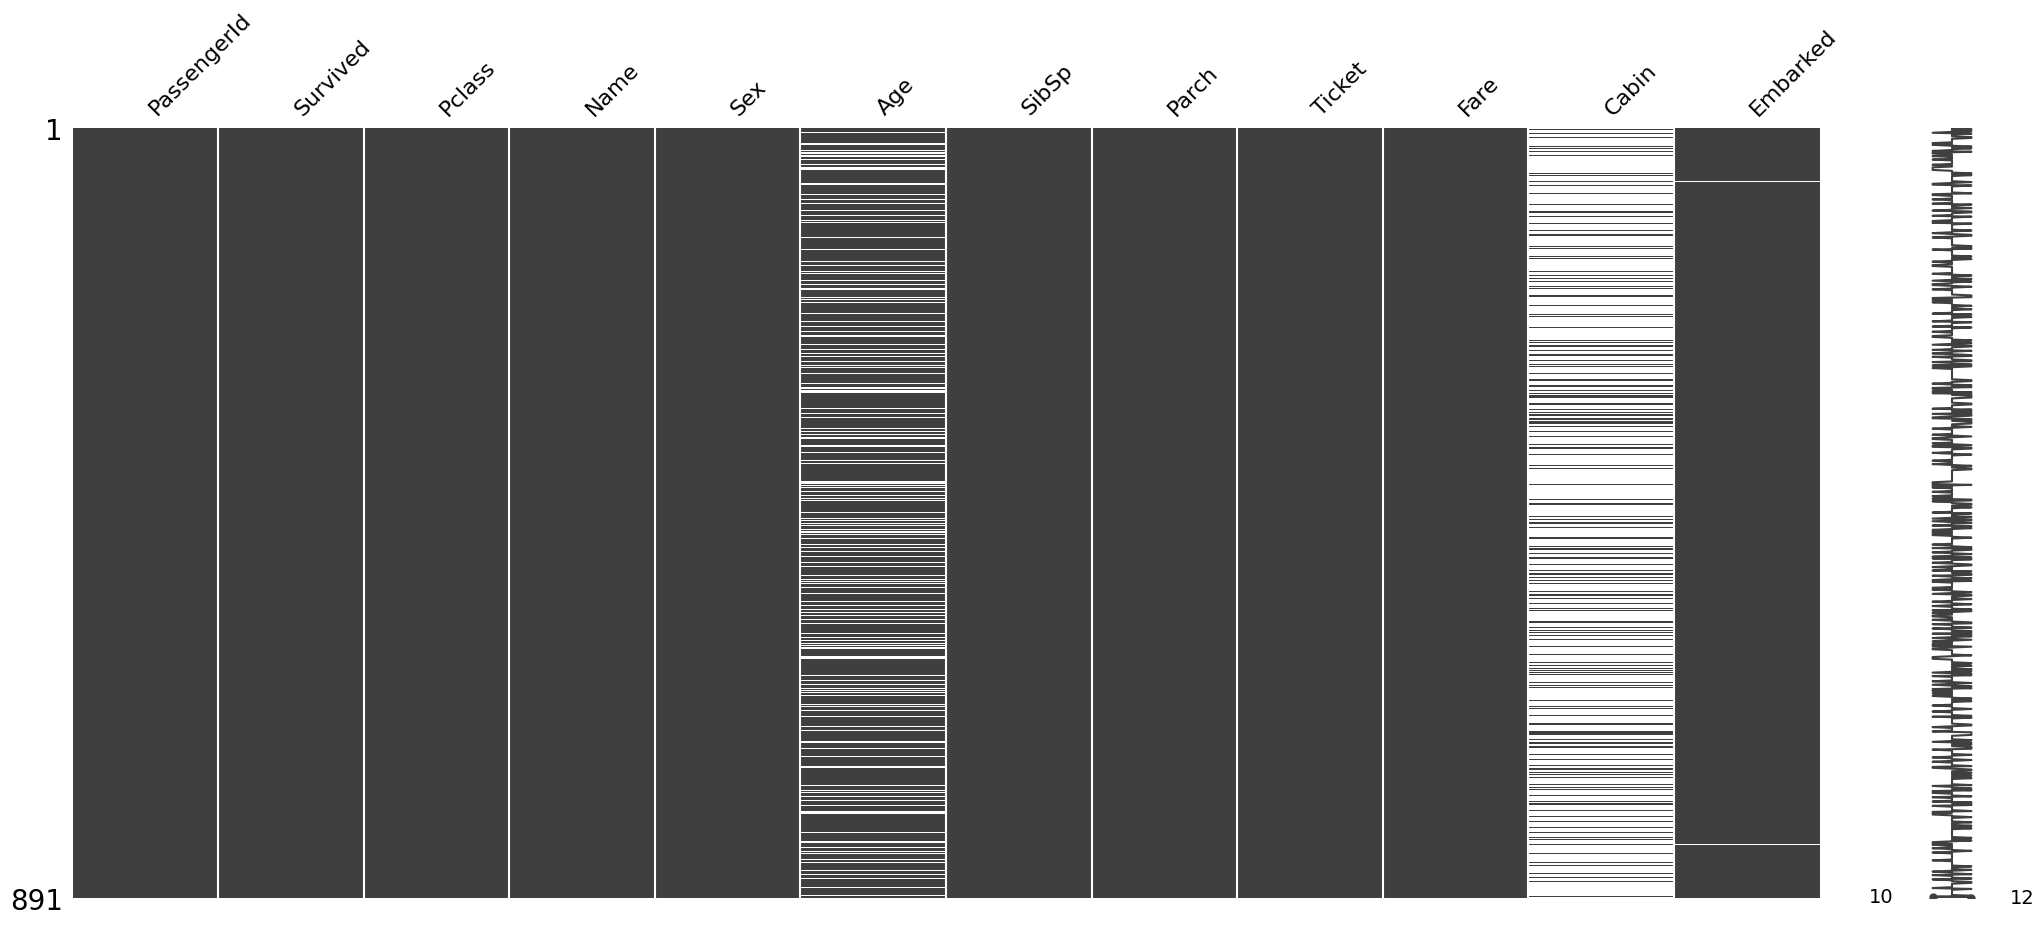

In [12]:
missingno.matrix(dftrain)

<Axes: >

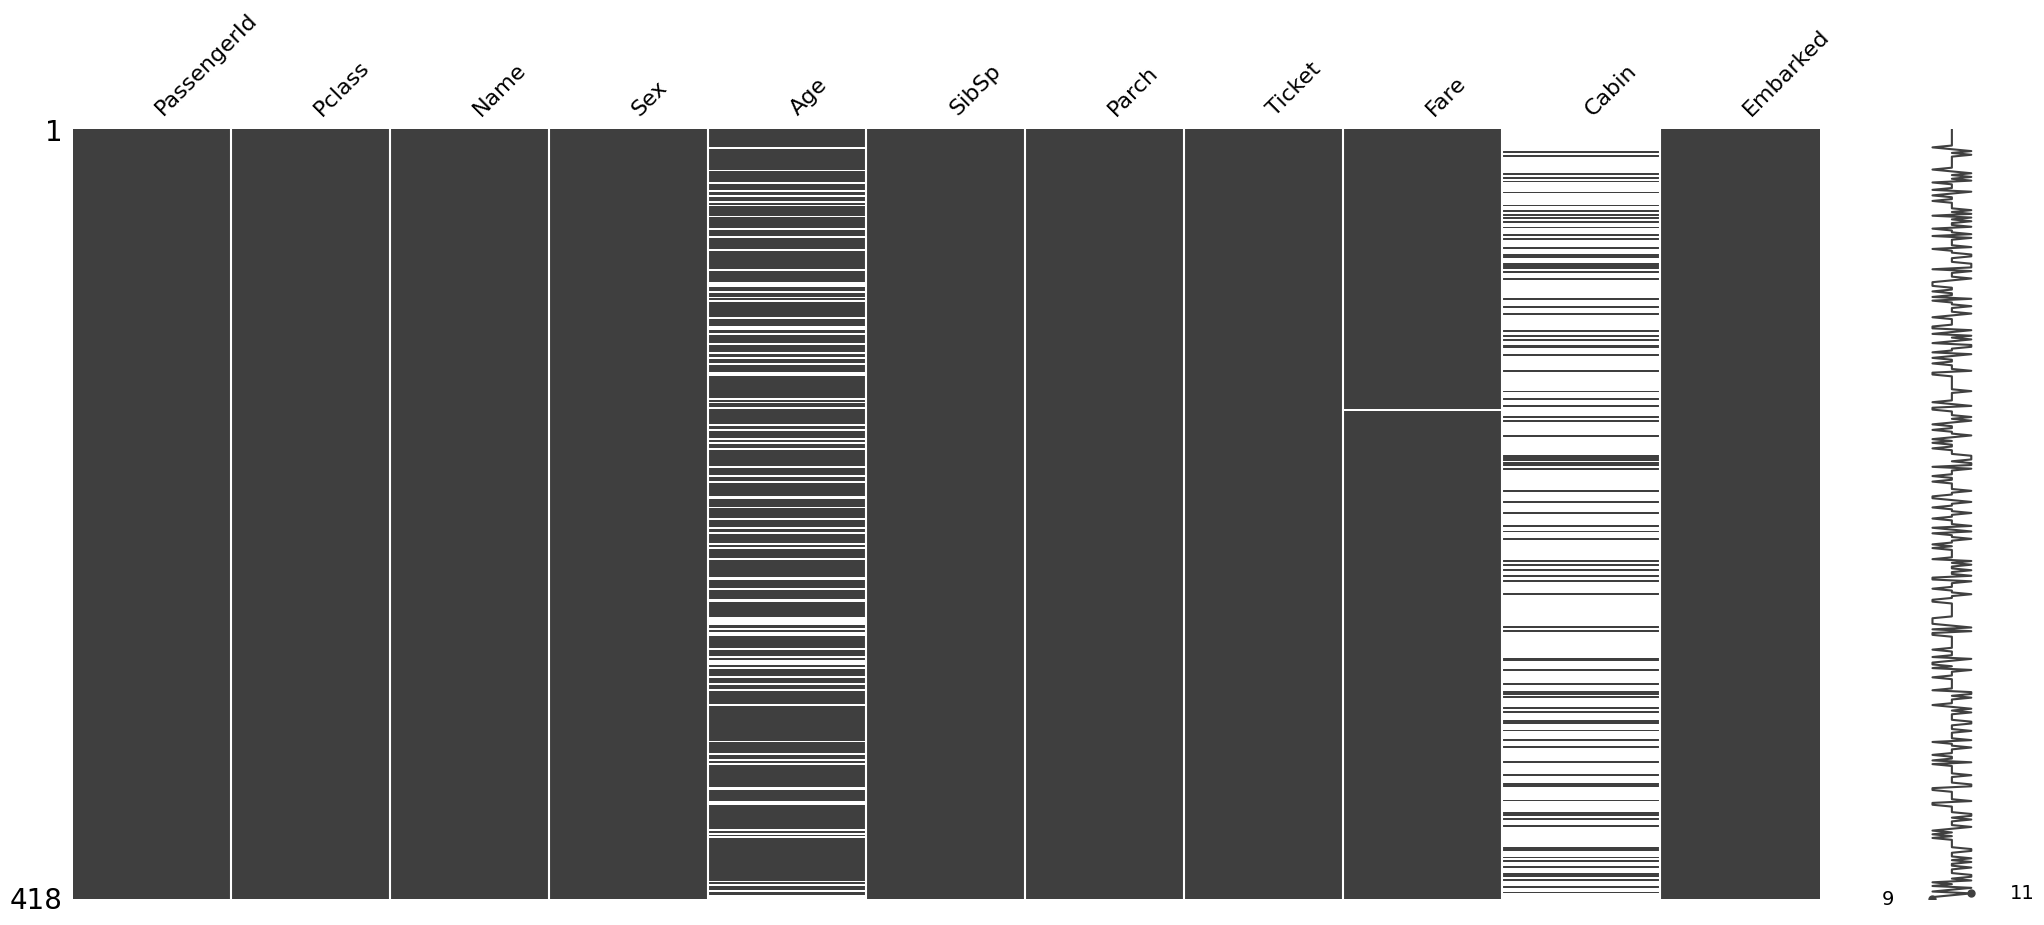

In [13]:
missingno.matrix(dftest)

In [14]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
dftest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Feature Analysis

1. Sex

In [16]:
# Value Count
dftrain["Sex"].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
# Mean of the Surviving via sex
dftrain[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Plotting of sorts

In [18]:
# Imports
import seaborn as sea
import matplotlib.pyplot as plt

/tmp/ipykernel_17971/686200078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x = "Sex", y = "Survived", data = dftrain, palette=palette)


Text(0.5, 1.0, 'Probability')

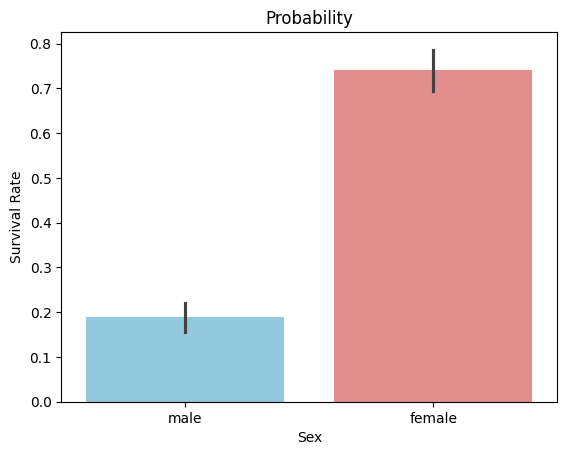

In [19]:
palette = {"male": "skyblue", "female": "lightcoral"}
sea.barplot(x = "Sex", y = "Survived", data = dftrain, palette=palette)
plt.ylabel("Survival Rate")
plt.title("Probability")

2. Class of Ticket

In [20]:
dftrain["Pclass"].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
# Mean of the Surviving via Class
dftrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/tmp/ipykernel_17971/309273928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x = "Pclass", y = "Survived", data = dftrain, palette=palette)


Text(0.5, 1.0, 'Probability')

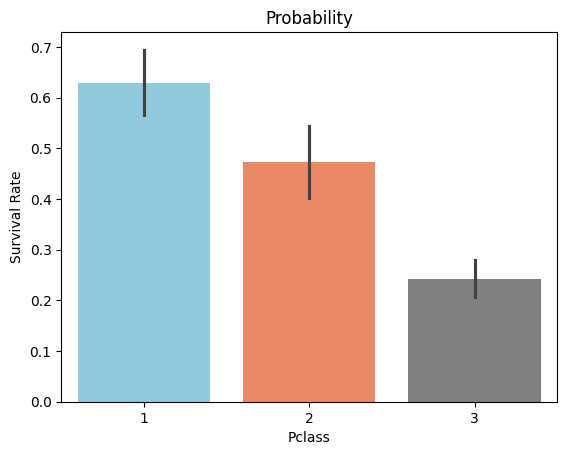

In [22]:
palette = {"1": "skyblue", "2": "coral", "3": "Gray"}
sea.barplot(x = "Pclass", y = "Survived", data = dftrain, palette=palette)
plt.ylabel("Survival Rate")
plt.title("Probability")

Class and Gender as seen Together

Text(0.5, 1.0, 'Probability by Sex and Ticket Class')

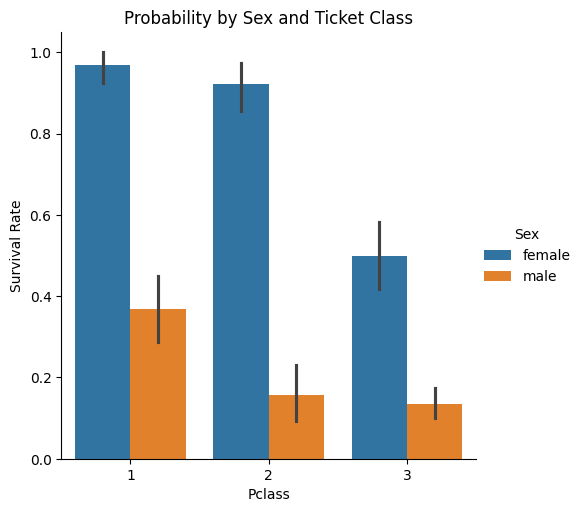

In [23]:
Sp = sea.catplot(x = "Pclass", y = "Survived", hue = "Sex",  data = dftrain, kind = "bar")
plt.ylabel("Survival Rate")
plt.title("Probability by Sex and Ticket Class")

3. Embarked

In [24]:
# Value count
dftrain["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [25]:
# Mean of the Surviving via Embarked
dftrain[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

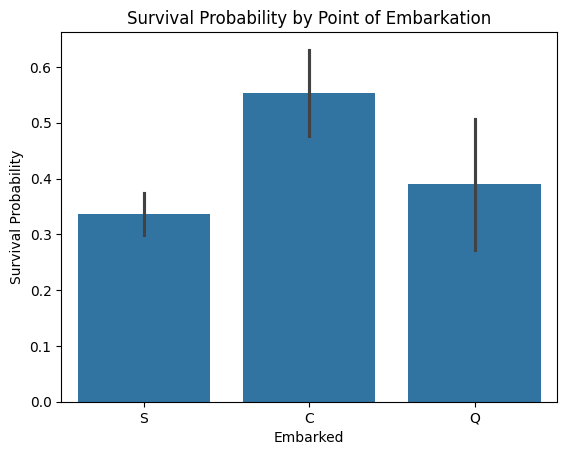

In [26]:
sea.barplot(x = 'Embarked', y ='Survived', data = dftrain)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Now that we have seen the data set, visually, we may now remove outliers

In [27]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dftrain, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
dftrain.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
print("Before: {} rows".format(len(dftrain)))
dftrain = dftrain.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dftrain)))

Before: 891 rows
After: 881 rows


Co-relations

<Axes: >

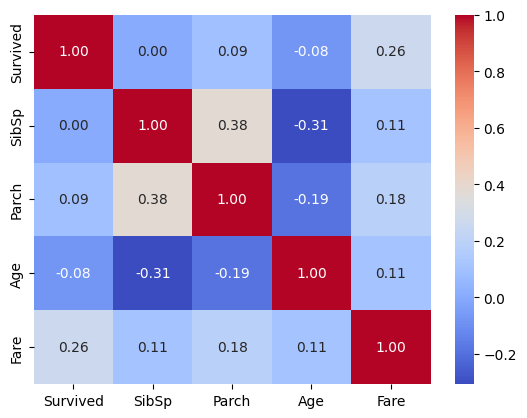

In [30]:
sea.heatmap(dftrain[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [31]:
dftrain['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [32]:
print("Mean of Siblings and sprouses aboard")
dftrain[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


Mean of Siblings and sprouses aboard


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

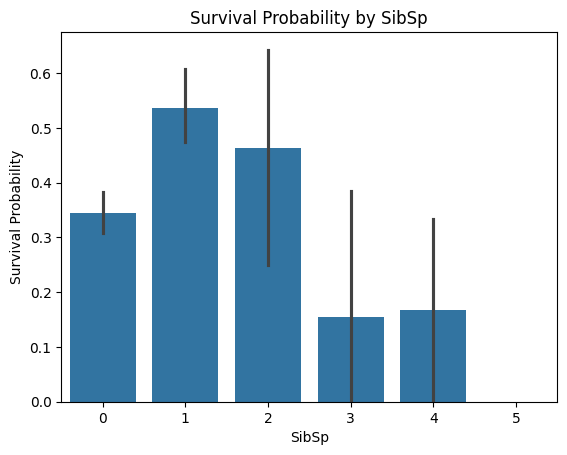

In [33]:
sea.barplot(x = 'SibSp', y ='Survived', data = dftrain)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [34]:
print("Parents and chlidren: ")

dftrain['Parch'].value_counts(dropna = False)

Parents and chlidren: 


Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [35]:
dftrain[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

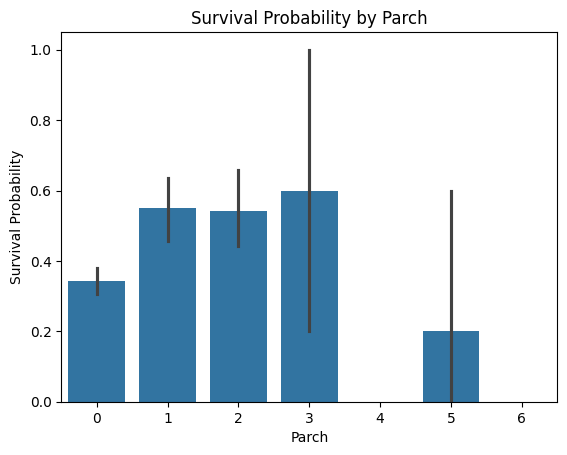

In [36]:
sea.barplot(x = 'Parch', y ='Survived', data = dftrain)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [37]:
print("Cosidering the Age Column with null values: ")
dftrain['Age'].isnull().sum()

Cosidering the Age Column with null values: 


170

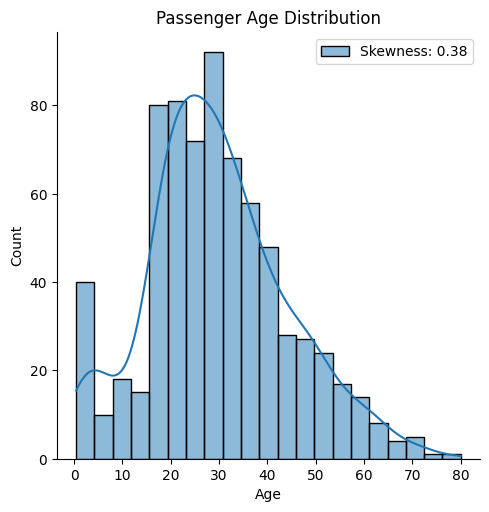

In [38]:
plot = sea.displot(dftrain['Age'], kde=True, label=f'Skewness: {dftrain["Age"].skew():.2f}')
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

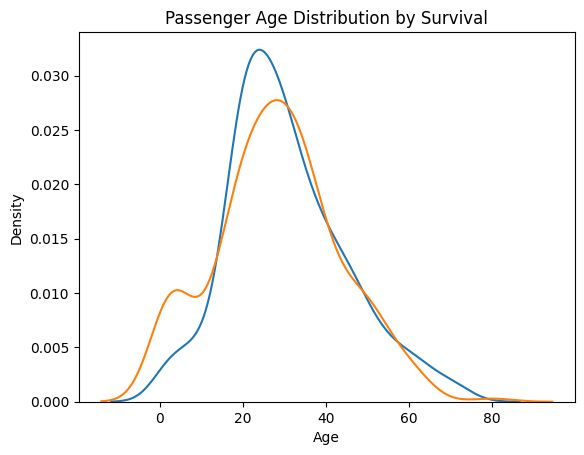

In [39]:
sea.kdeplot(dftrain['Age'][dftrain['Survived'] == 0], label = 'Did not survive')
sea.kdeplot(dftrain['Age'][dftrain['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

Fare Feature Visualization 

In [40]:
dftrain['Fare'].isnull().sum()

0

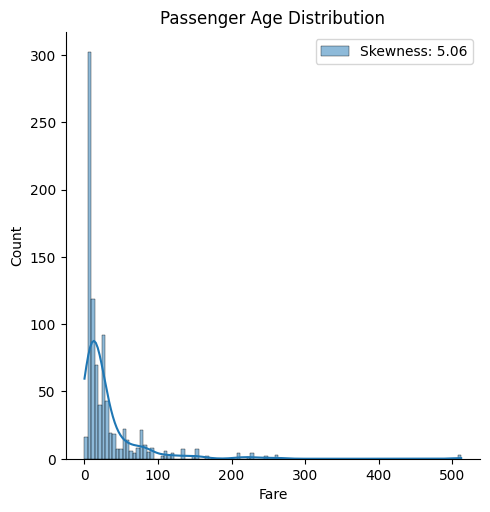

In [41]:
plot = sea.displot(dftrain['Fare'], kde=True, label=f'Skewness: {dftrain["Fare"].skew():.2f}')
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()

Maybe Include

In [42]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [43]:
dftrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [44]:
dftest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [46]:
imputer = IterativeImputer(estimator=RandomForestRegressor(), missing_values=np.nan, max_iter=10, random_state=0)

In [47]:
cols = ["Age"]
dftrain_imputed = imputer.fit_transform(dftrain[cols])
dftrain[cols] = dftrain_imputed

In [48]:
dftrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [49]:
dftest_imputed = imputer.fit_transform(dftest[cols])
dftest[cols] = dftest_imputed

In [50]:
dftest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

For Cabin

In [51]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')

In [52]:
categorical_columns = ['Cabin', 'Embarked']
dftrain[categorical_columns] = imputer_cat.fit_transform(dftrain[categorical_columns])

In [53]:
dftrain.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
categorical_columns = ['Cabin', 'Embarked', "Fare"]
dftest[categorical_columns] = imputer_cat.fit_transform(dftest[categorical_columns])

In [55]:
dftest.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [56]:
combine = pd.concat([dftrain, dftest], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,B96 B98,S


In [57]:
print("All set values")

All set values


In [58]:
combine.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [59]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

Fare Assessment

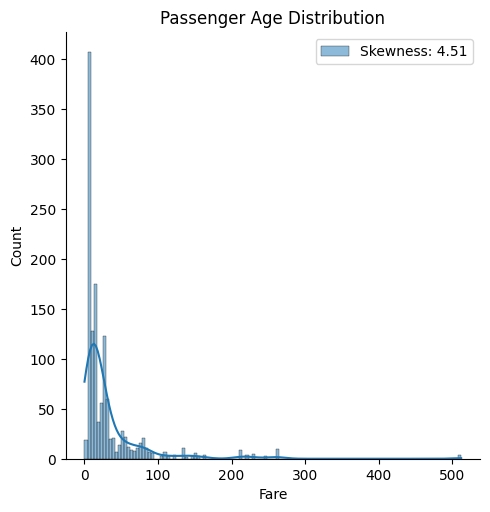

In [60]:
plot = sea.displot(combine['Fare'], kde=True, label=f'Skewness: {combine["Fare"].skew():.2f}')
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()

Technique used is taking log to address skewness

In [61]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

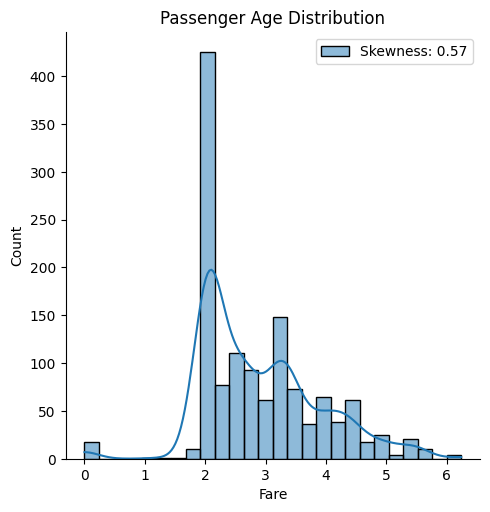

In [62]:
plot = sea.displot(combine['Fare'], kde=True, label=f'Skewness: {combine["Fare"].skew():.2f}')
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()

Feature Analysis

In [63]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,B96 B98,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,B96 B98,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,B96 B98,S


In [64]:
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [65]:
combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [66]:
combine['Title'].nunique()

18

In [67]:
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<Axes: xlabel='count', ylabel='Title'>

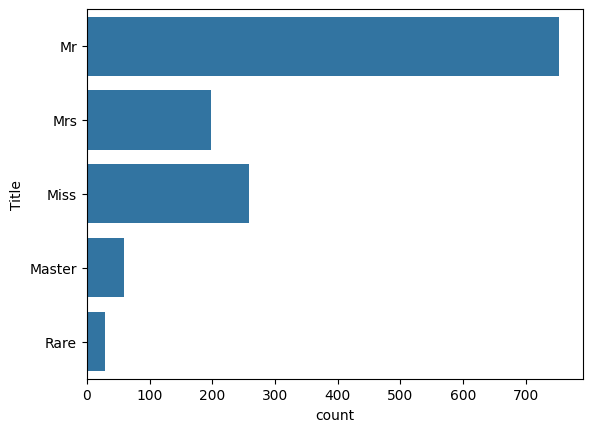

In [68]:
sea.countplot(combine['Title'])

In [69]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


In [70]:
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,B96 B98,S,Mr
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,B96 B98,S,Miss
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,0,35.0,0,0,373450,2.085672,B96 B98,S,Mr


In [71]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [72]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [73]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [74]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [75]:
combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,A/5 21171,1.981001,B96 B98,S,Mr,0
1,2,1.0,1,1,38.0,PC 17599,4.266662,C85,C,Mrs,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.070022,B96 B98,S,Miss,1
3,4,1.0,1,1,35.0,113803,3.972177,C123,S,Mrs,0
4,5,0.0,3,0,35.0,373450,2.085672,B96 B98,S,Mr,1


In [76]:
combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.346979
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [77]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [78]:
combine = combine.drop('AgeBand', axis = 1)

In [79]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [80]:
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [81]:
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


Method for encodings

In [82]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,A/5 21171,1.981001,B96 B98,S,Mr,0,3
1,2,1.0,1,1,2,PC 17599,4.266662,C85,C,Mrs,0,2
2,3,1.0,3,1,1,STON/O2. 3101282,2.070022,B96 B98,S,Miss,1,3
3,4,1.0,1,1,2,113803,3.972177,C123,S,Mrs,0,2
4,5,0.0,3,0,2,373450,2.085672,B96 B98,S,Mr,1,6


In [83]:
combine2 = combine

In [84]:
combine = combine.drop("Ticket", axis=1)
combine = combine.drop("Cabin", axis=1)

In [85]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [86]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,2.070022,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,2.085672,1,6,False,False,True,False,False,False,False,True


In [87]:
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [88]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [89]:
combine['Fare'] = combine['Fare'].astype('int')

In [90]:
combine = combine.drop('FareBand', axis = 1)

In [91]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [92]:
train = combine[:len(dftrain)]
test = combine[len(dftrain):]

In [93]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [94]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [95]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [96]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,NaN,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,NaN,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,NaN,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,NaN,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [97]:
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,3,1,1,1,0,3,False,False,False,True,False,False,False,True


Strategies for modelling

In [98]:
print("Split the data: ")

Split the data: 


In [99]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [100]:
from sklearn.model_selection import train_test_split

## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})
# Save the submission to a CSV file
submission.to_csv('/home/buttsy/ML/PythonLabs/LOGRAli.csv', index=False)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.7

## SVM

In [102]:
from sklearn.svm import SVC

In [103]:
svc = SVC(kernel='rbf', C=10.0, gamma='scale')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})
# Save the submission to a CSV file
submission.to_csv('/home/buttsy/ML/PythonLabs/SVMAli.csv', index=False)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.34

## KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

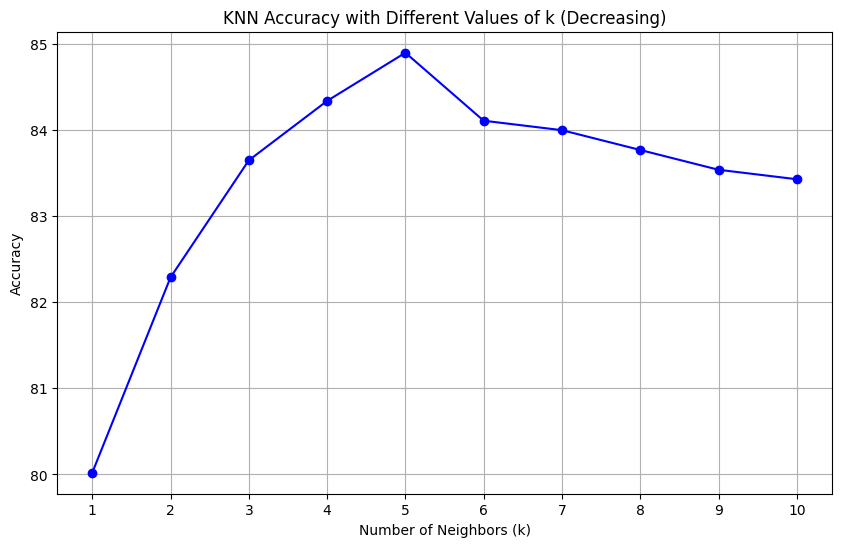

In [105]:
k_range = range(1, 11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    acc_knn
    scores.append(acc_knn)

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with Different Values of k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [106]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})
# Save the submission to a CSV file
submission.to_csv('/home/buttsy/ML/PythonLabs/KNNAli.csv', index=False)

## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [108]:
decision_tree = DecisionTreeClassifier(
    criterion='gini',       
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=41
)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})
# Save the submission to a CSV file
submission.to_csv('/home/buttsy/ML/PythonLabs/DTAli.csv', index=False)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.58

Ensemble 1

## Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})

submission.to_csv('/home/buttsy/ML/PythonLabs/RFAli.csv', index=False)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy:", acc_random_forest)

Accuracy: 85.58


Using Neutal Networks

In [111]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

model = Sequential([
    Dense(16, input_dim=X_train2.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train2, Y_train, epochs=100, batch_size=10, validation_split=0.2)

predictions = model.predict(X_test2)
predicted_classes = (predictions > 0.5).astype("int32")

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predicted_classes.flatten()
})

submission.to_csv('/home/buttsy/ML/PythonLabs/ANNAli.csv', index=False)

print("Submission file has been saved as submission.csv")

2024-06-23 18:38:18.867152: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 18:38:29.201006: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 18:38:33.270590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 18:38:46.643275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/buttsy/ML/snowflakes/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6104 - loss: 0.6616 - val_accuracy: 0.6949 - val_loss: 0.5651
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6646 - loss: 0.5760 - val_accuracy: 0.6836 - val_loss: 0.5086
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6989 - loss: 0.5292 - val_accuracy: 0.7288 - val_loss: 0.4842
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7396 - loss: 0.5230 - val_accuracy: 0.7966 - val_loss: 0.4658
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.5144 - val_accuracy: 0.8362 - val_loss: 0.4497
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7681 - loss: 0.5069 - val_accuracy: 0.8362 - val_loss: 0.4291
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7691 - loss: 0.4682 - val_accuracy: 0.8362 - val_loss: 0.4143
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4664 - val_accuracy: 0.8362 - 

In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

model = Sequential([
    Dense(128, input_dim=X_train2.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train2, Y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

predictions = model.predict(X_test2)
predicted_classes = (predictions > 0.5).astype("int32")

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predicted_classes.flatten()
})

submission.to_csv('/home/buttsy/ML/PythonLabs/ANNAliC.csv', index=False)

print("Submission file has been saved as ANNAliC.csv")

Epoch 1/200


/home/buttsy/ML/snowflakes/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6517 - loss: 0.6655 - val_accuracy: 0.7797 - val_loss: 0.6157 - learning_rate: 0.0010
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7516 - loss: 0.5475 - val_accuracy: 0.7797 - val_loss: 0.5669 - learning_rate: 0.0010
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7381 - loss: 0.5137 - val_accuracy: 0.7910 - val_loss: 0.5291 - learning_rate: 0.0010
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7397 - loss: 0.5433 - val_accuracy: 0.8192 - val_loss: 0.4977 - learning_rate: 0.0010
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7572 - loss: 0.5192 - val_accuracy: 0.8136 - val_loss: 0.4777 - learning_rate: 0.0010
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7632 - loss: 0.5065 - val_accuracy: 0.8136 - val_loss: 0.4642 - learning_rate: 0.0010
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.5230 - val_accuracy: 0.84

Cat Boost

In [113]:
from catboost import CatBoostClassifier

In [114]:
catboost = CatBoostClassifier(
    iterations=500,
    depth=10,
    learning_rate=0.1,
    l2_leaf_reg=3,
    loss_function='MultiClass'
)
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)

acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

0:	learn: 0.6550051	total: 85.3ms	remaining: 42.6s
1:	learn: 0.6257379	total: 90.7ms	remaining: 22.6s
2:	learn: 0.5984883	total: 97.3ms	remaining: 16.1s
3:	learn: 0.5742320	total: 97.9ms	remaining: 12.1s
4:	learn: 0.5523680	total: 104ms	remaining: 10.3s
5:	learn: 0.5330517	total: 111ms	remaining: 9.1s
6:	learn: 0.5173668	total: 112ms	remaining: 7.85s
7:	learn: 0.5030650	total: 117ms	remaining: 7.17s
8:	learn: 0.4884352	total: 122ms	remaining: 6.64s
9:	learn: 0.4775773	total: 126ms	remaining: 6.19s
10:	learn: 0.4667149	total: 132ms	remaining: 5.87s
11:	learn: 0.4582013	total: 133ms	remaining: 5.4s
12:	learn: 0.4492119	total: 138ms	remaining: 5.18s
13:	learn: 0.4414864	total: 145ms	remaining: 5.04s
14:	learn: 0.4345809	total: 147ms	remaining: 4.74s
15:	learn: 0.4289176	total: 154ms	remaining: 4.66s
16:	learn: 0.4230609	total: 158ms	remaining: 4.5s
17:	learn: 0.4184398	total: 163ms	remaining: 4.37s
18:	learn: 0.4145027	total: 171ms	remaining: 4.33s
19:	learn: 0.4106267	total: 176ms	remain

In [115]:
acc_catboost

85.58

# XG Boost

In [116]:
import xgboost as xgb

In [117]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [118]:
clf_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [119]:
xgb_pred = clf_xgb.predict(X_test)
xgb_pred_prb=clf_xgb.predict_proba(X_test)[:,1]

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predicted_classes.flatten()
})

submission.to_csv('/home/buttsy/ML/PythonLabs/XGBAli.csv', index=False)

Making Accuracy Meaned Array

In [ ]:
from sklearn.model_selection import cross_val_score

classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    CatBoostClassifier(silent=True)  # Adding silent=True to suppress CatBoost output
]

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring='accuracy', cv=10))

cv_mean = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

cv_res = pd.DataFrame({
    'Cross Validation Mean': cv_mean,
    'Cross Validation Std': cv_std,
    'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Decision Tree', 'Random Forest', 'CatBoost']
})

cv_res_sorted = cv_res.sort_values(by='Cross Validation Mean', ascending=False, ignore_index=True)

# Bar Plot of Accuracy Scores

/tmp/ipykernel_17971/3766279918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(


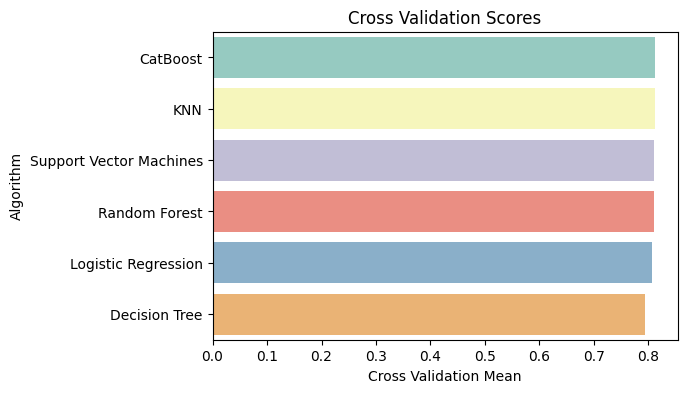

In [146]:
plt.figure(figsize=(6, 4))
sea.barplot(
    x='Cross Validation Mean', 
    y='Algorithm', 
    data=cv_res_sorted, 
    palette='Set3'
)

plt.xlabel('Cross Validation Mean')
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')
plt.show()